A chatbot is a software application used to conduct an online chat conversation via text or text-to-speech, in lieu of providing direct contact with a live human agent. Designed to convincingly simulate the way a human would behave as a conversational partner, chatbot systems typically require continuous tuning and testing, and many in production remain unable to adequately converse or pass the industry standard Turing test.

### Three types

- Rule Based
- Self Learning
- Hybrid 

### Steps
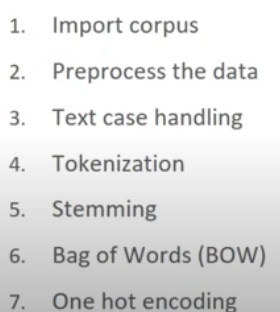

In [2]:
#pip install tflearn

In [7]:
import tflearn
import tensorflow
import numpy as np 
import random
import nltk
import json
import string

In [3]:
f=open('chatbot.txt','r',errors='ignore')
raw_doc=f.read()
raw_doc=raw_doc.lower()
nltk.download('punkt')
nltk.download('wordnet')
sent_tokens=nltk.sent_tokenize(raw_doc)
word_tokens=nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nehal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
sent_tokens[:2]

['data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge and actionable insights from data across a broad range of application domains.',
 'data science is related to data mining, machine learning and big data.']

In [5]:
word_tokens[:2]

['data', 'science']

#### TEXT Preprocessing

In [8]:
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


#### Greeting Functions

In [9]:
GREET_INPUTS = ('hello','hi','greetings','sup',"what's up","hey")
GREET_RESPONSES= ['hi','hey',"*nods*","hi there","hello","I am glad! You are talking to me"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

#### Response Generation

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
def response(user_response):
    robo1_response=''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals=cosine_similarity(tfidf[-1],tfidf)
    idx=vals.argsort()[0][-2]
    flat=vals.flatten()
    flat.sort()
    req_tfidf=flat[-2]
    if(req_tfidf==0):
        robo1_response=robo1_response+"I am sorry! I don't understand"
        return robo1_response
    else:
        robo1_response=robo1_response+sent_tokens[idx]
        return robo1_response
    

#### Start and end of a conversation

In [ ]:
flag=True
print("BOT: My name is Stark. Let's have a conversation! Also , if u want to exit any time, just type Bye")
while(flag==True):
    user_response=input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag=False
            print('BOT: You are welcome..')
        else:
            if(greet(user_response)!=None):
                print("BOT:"+greet(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens=word_tokens+nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print('BOT:',end='')
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print('BOT: Goodbye! Take Care :)')

BOT: My name is Stark. Let's have a conversation! Also , if u want to exit any time, just type Bye
gd
BOT:

c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


I am sorry! I don't understand
Hi 
BOT:hey
how are u


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:"us nsf - nsb-05-40, long-lived digital data collections enabling research and education in the 21st century".
ok


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:I am sorry! I don't understand
really


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:I am sorry! I don't understand
hey
BOT:*nods*
hi
BOT:hello
hey
BOT:*nods*
hey
BOT:hello
hi
BOT:hi
what is data science


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:"what is data science?
foundations


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:[6]


contents
1	foundations
1.1	relationship to statistics
2	etymology
2.1	early usage
2.2	modern usage
3	market
4	technologies and techniques
4.1	techniques
5	see also
6	references
foundations
data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data), and applying the knowledge and actionable insights from data to solve problems in a wide range of application domains.
impact of data science


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:"how data science will impact future of businesses?".
impact


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:"the impacts of big data that you may not have heard of".
impact of data


c:\users\nehal\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


BOT:"the impacts of big data that you may not have heard of".
